<a href="https://colab.research.google.com/github/marianegri/Python_DataScience_MachineLearning/blob/main/Peixes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

fish_obesity_df = pd.read_csv("https://drive.google.com/uc?id=1cMmz4dSK0vcQCDsed_NjyW-6JsNbovYm") 
fish_obesity_df.head()

,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0


In [ ]:
from sklearn.model_selection import train_test_split

labels =  fish_obesity_df['Obese']

features = fish_obesity_df[['Height','Weight']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)



In [ ]:
from sklearn.svm import SVC

classifier = SVC(C=1)
classifier.fit(X_train, y_train)

SVC(C=1)

In [ ]:

y_result = classifier.predict(X_test)

X_test



,Height,Weight
32,172,68
131,175,141
492,176,121
29,171,78
504,184,147
...,...,...
47,180,62
282,165,155
348,179,110
190,197,125


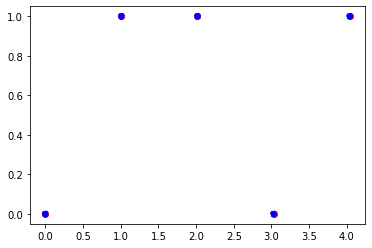

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 109, num=109)

plt.scatter(x[:5], y_test[:5], color ='red')

plt.scatter(x[:5], y_result[:5], color ='blue', linestyles='--')

In [ ]:
# Colocar matriz de confusão
# Indicadores: acurácia = (VP+VN)/(VP+VN+FP+FN)
#              precisão = VP/(VP+FP)
#              recall   =
#              f1score  = media armonica entre precisão e recall

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.98      0.94      0.96        65

    accuracy                           0.95       109
   macro avg       0.95      0.96      0.95       109
weighted avg       0.96      0.95      0.95       109

accuracy 0.9541284403669725
precision 0.9838709677419355
recall 0.9384615384615385
f1_score 0.9606299212598426


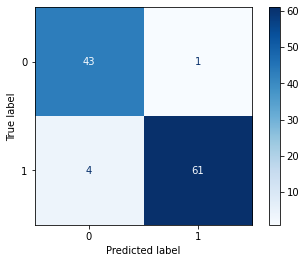

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(classification_report(y_test,y_pred))

# Acurácia, ou: em geral, qual o percentual de acerto?
accuracy = (tp + tn) / (tp + tn + fp + fn)
print ("accuracy", accuracy)

#Precision, ou: entre os que previ serem positivos, qual o percentual de acerto?
precision = tp / (tp + fp)
print ("precision", precision)

#Recall, ou: entre os que são positivos, qual o percentual de acerto?
recall = tp / (tp + fn)
print ("recall", recall)

#f1 score: media harmônica de Precision e Recall
f1_score = 2 * ((precision * recall) / (precision + recall))
print ("f1_score", f1_score)